### Codio Activity 13.5: Experimenting with $\beta_0$ and $\beta_1$ in Logistic Function

**Expected Time: 45 Minutes**

**Total Points: 40**

This activity focuses on changing the $\beta_0$ and $\beta_1$ parameters within the logistic function.  Your goal should be to understand how each parameter effects the resulting sigmoid curve.  In the next activity, you will use a numeric approach to identify the best parameters to fit a given classification problem, here your goal is to see how these parameters change the geometry of the curve.

### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### The Data

For this activity we revisit the credit data and examine only the balance feature to classifiy 

In [54]:
credit = pd.read_csv('data/default.csv')

In [55]:
credit.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [56]:
y = np.where(credit['default'] == 'Yes', 1, 0)

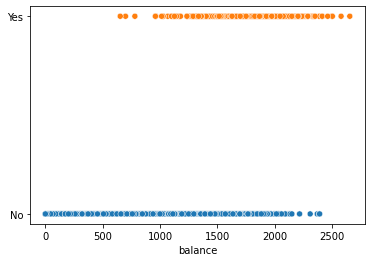

In [57]:
sns.scatterplot(data = credit, x = 'balance', y = y, hue = 'default', legend = False)
plt.yticks([0, 1], ['No', 'Yes']);

[Back to top](#-Index)

### Problem 1

### Function for Plotting 

**10 Points**

Use the formula below to create a function that takes in a value for `x`, `beta_0`, and `beta_1`, and returns:

$$\text{sigmoid}(f, \beta_0, \beta_1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x})}$$



In [58]:
### GRADED

def sigmoid(x, beta_0, beta_1):
    """Implements sigmoid function with linear parameters
    beta_0 and beta_1.
    
    Parameters
    ----------
    x: type `np.ndarray`
       1D NumPy array of domain inputs
    beta_0: type `float`
        float representing y-intercept of linear exponent
    beta_1: type `float`
        float representing slope of linear exponent
        
    Returns array of values size len(x)
    """
    return None

### BEGIN SOLUTION
def sigmoid(x, beta_0, beta_1):
    return 1/(1 + np.exp(-(beta_0 + beta_1*x)))
### END SOLUTION

# Answer check
sigmoid(np.array([-1, 0, 1]), 1, 1)

array([0.5       , 0.73105858, 0.88079708])

In [44]:
### BEGIN HIDDEN TESTS
def sigmoid_(x, beta_0, beta_1):
    return 1/(1 + np.exp(-(beta_0 + beta_1*x)))
x = np.linspace(0, 2600, 100)
#
#
#
np.testing.assert_array_equal(sigmoid_(x, 1, 1), sigmoid(x, 1, 1))
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

### Varying $\beta_0$

**10 Points**

Below, the image shows three curves plotted, all with $\beta_1 = 0.01$, and with $\beta_0 = 5, 10, 15$.  Enter your answer as an integer with the appropriate $\beta_0$ value to the respective variables `a`, `b`, and `c` below.

1. $\beta_0 = 15$
2. $\beta_0 = 10$
3. $\beta_0 = 5$

<center>
    <img src = 'images/betasopt.png' />
</center>

In [59]:
### GRADED

#assign integer values for beta0 to appropriate variable 5, 10, or 15
a = ''
b = ''
c = ''

### BEGIN SOLUTION
a = 5
b = 10
c = 15
### END SOLUTION

# Answer check
print(type(a))

<class 'int'>


In [46]:
### BEGIN HIDDEN TESTS
a_ = 5
b_ = 10
c_ = 15
#
#
#
assert a == a_
assert b == b_
assert c == c_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

### Varying $\beta_1$

**10 Points**

Now, compare the given values for $\beta_1$ with $\beta_0 = 10$ and match the correct curve with the given value as a float below.

1. $\beta_1 = -0.025$
2. $\beta_1 = -0.01$
3. $\beta_1 = -0.005$


<center>
    <img src = 'images/p3.png' />
</center>

In [60]:
### GRADED

#assign float values for beta0 to appropriate variable -0.025, 0.01, or 0.005 below
a = ''
b = ''
c = ''

### BEGIN SOLUTION
a = -0.01
b = -0.025
c = -0.005
### END SOLUTION

# Answer check
print(type(a))

<class 'float'>


In [48]:
### BEGIN HIDDEN TESTS
a_ = -0.01
b_ = -0.025
c_ = -0.005
#
#
#
assert a == a_
assert b == b_
assert c == c_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 4

### Comparing to `LogisticRegression` estimator

**10 Points**

Finally, identify the values that the scikitlearn estimator `LogisticRegression` suggests for $\beta_0$ and $\beta_1$.  Assign these as floats to `beta_0` and `beta_1` below.  

-10.651328236506073
0.0054989155471654085
0.0 2654.322576280184
x  [   0.            2.6026026     5.20520521    7.80780781   10.41041041
   13.01301301   15.61561562   18.21821822   20.82082082   23.42342342
   26.02602603   28.62862863   31.23123123   33.83383383   36.43643644
   39.03903904   41.64164164   44.24424424   46.84684685   49.44944945
   52.05205205   54.65465465   57.25725726   59.85985986   62.46246246
   65.06506507   67.66766767   70.27027027   72.87287287   75.47547548
   78.07807808   80.68068068   83.28328328   85.88588589   88.48848849
   91.09109109   93.69369369   96.2962963    98.8988989   101.5015015
  104.1041041   106.70670671  109.30930931  111.91191191  114.51451451
  117.11711712  119.71971972  122.32232232  124.92492492  127.52752753
  130.13013013  132.73273273  135.33533534  137.93793794  140.54054054
  143.14314314  145.74574575  148.34834835  150.95095095  153.55355355
  156.15615616  158.75875876  161.36136136  163.96396396  166.56656657
  169.16916

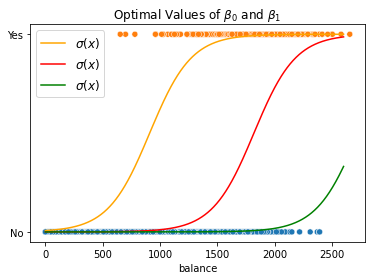

In [66]:
### GRADED

beta_0 = ''
beta_1 = ''

### BEGIN SOLUTION
clf = LogisticRegression().fit(credit[['balance']], y)
beta_0 = float(clf.intercept_)
beta_1 = float(clf.coef_)

print(beta_0)
print(beta_1)
### END SOLUTION

# print('x ', x)
x = np.linspace(0, 2600, 1000)
x_values = np.linspace(credit['balance'].min(), credit['balance'].max(), 100)
print(credit['balance'].min(), credit['balance'].max())
print('x ', x)
print('x_values ', x_values)



# Answer check
sns.scatterplot(data = credit, x = 'balance', y = y, hue = 'default', legend = False)
plt.yticks([0, 1], ['No', 'Yes'])
# plt.plot(x, sigmoid(x, beta_0, beta_1), '--', color = 'black', label = r'$\sigma(x)$')
plt.plot(x, sigmoid(x, -5, beta_1),  color = 'orange', label = r'$\sigma(x)$')
plt.plot(x, sigmoid(x, -10, beta_1), color = 'red', label = r'$\sigma(x)$')
plt.plot(x, sigmoid(x, -15, beta_1),  color = 'green', label = r'$\sigma(x)$')
plt.legend(fontsize = 12)
plt.title(r'Optimal Values of $\beta_0$ and $\beta_1$');

In [50]:
### BEGIN HIDDEN TESTS
clf_ = LogisticRegression().fit(credit[['balance']], y)
beta_0_ = float(clf_.intercept_)
beta_1_ = float(clf_.coef_)
#
#
#
assert beta_0 == beta_0_
assert beta_1 == beta_1_
### END HIDDEN TESTS

Now that you have a feel for how these parameters control the shape of the sigmoid curve, we will introduce a loss function that we try to minimize in order to solve for the optimal values of $\beta_0$ and $\beta_1$.